# Exercise 4

The purpose of this exercise is to help you learn how to use some of the preprocessing functions available in Python.

**Step 1.** For this exercise, you will be using the same dataset as the one given in Exercise 3. Load the auto-mpg.data file into a pandas DataFrame and replace the missing values '?' of a column with the median value of the column.

In [1]:
import pandas as pd
import re

colnames = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']

def getData(Row):
    
    regex = r'\s+'          # splits by spaces
    fields = pd.Series([None if x=='?' else x for x in re.split(regex, Row)])
    return fields   

data_temp = pd.read_csv("auto-mpg1.data",sep='\t',header=None)
data = pd.DataFrame(data_temp[0].apply(getData))
data.columns = colnames[:-1]
data[colnames[-1]] = data_temp[1]


data = data.fillna(data.median())
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.,10.5,70,1,ford torino


**Step 2.** Drop the car_name column of the DataFrame. Calculate the correlation for all the columns. Note: you should apply astype('float') to convert all the columns to float before calculating their correlation.

**Solution:**

In [2]:
data = data.drop('car_name', 1)
corr = data.astype('float').corr() 
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
model_year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


**Step 3.** Apply principal component analysis to reduce the data to 2 dimensions.

**Solution:**

In [3]:
from sklearn.decomposition import PCA
    
pca = PCA(n_components=2)
pca.fit(data.values)

projected = pca.transform(data)
projected = pd.DataFrame(projected,columns=['pc1','pc2'], index=data.index)

projected.head()

,pc1,pc2
0,543.692090,51.046890
1,737.597223,79.416262
2,478.223494,75.668525
3,473.659818,62.795232
4,488.921154,56.018148


**Step 4.** Draw a horizontal bar plot to display the contribution of each attribute to the first two principal components.

**Solution:**

Text(0.5, 1.0, '2nd PC')

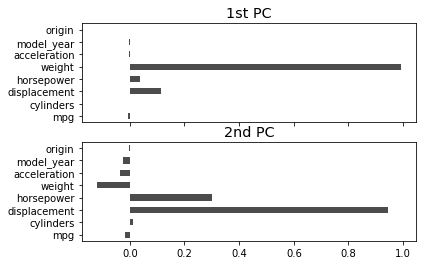

In [4]:
import matplotlib.pyplot as plt
from pandas import Series
%matplotlib inline

comp = pd.DataFrame(pca.components_, columns=data.columns, index=['pc1','pc2'])
comp

fig,axes = plt.subplots(2,1,sharex=True)
comp.loc['pc1'].plot(kind='barh',ax=axes[0],color='k',alpha=0.7)
axes[0].set_title('1st PC', size = 'x-large')
comp.loc['pc2'].plot(kind='barh',ax=axes[1],color='k',alpha=0.7)
axes[1].set_title('2nd PC', size = 'x-large')

 **Step 5.** Draw a 2-dimensional scatter plot of the data points along their first two principal components. 
 
**Solution:**

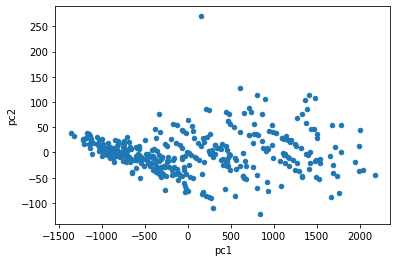

In [5]:
projected.plot(kind='scatter',x='pc1',y='pc2')